In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
df = pd.read_csv('../src/data/marketing_campaign_cleaned.csv', index_col=[0])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,27734400000000000,40,422,Partner,1,3,1


In [6]:
df['Educational_Years'] = df['Education'].replace({'Basic': 5, '2n Cycle': 8, 'Graduation': 12, 'Master': 18, 'PhD': 21})

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'Age', 'Spent',
       'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Educational_Years'],
      dtype='object')

### Is there correlation between the diploma owned and the martial status?

### Test for normality

In [8]:
normality_df = df[['Age', 'Income', 'Spent', 'Educational_Years']]

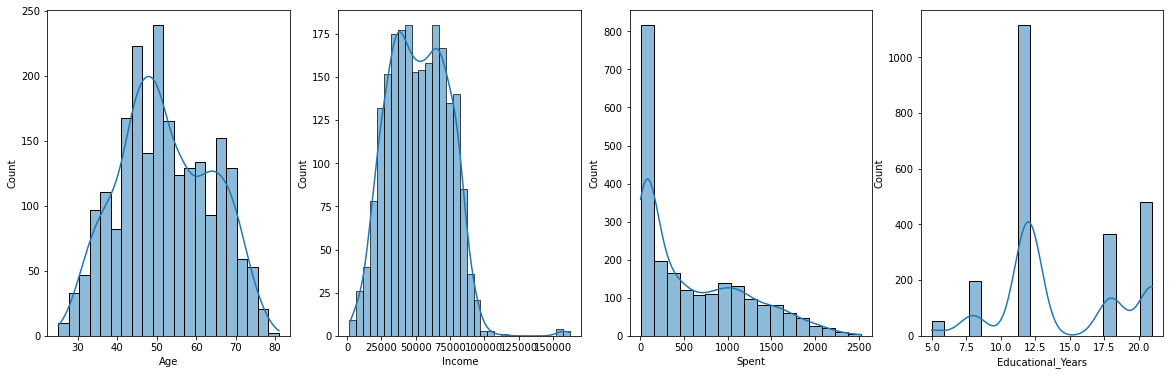

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

sns.histplot(normality_df['Age'], ax=ax1, kde=True);
sns.histplot(normality_df['Income'], ax=ax2, kde=True)
sns.histplot(normality_df['Spent'], ax=ax3, kde=True)
sns.histplot(normality_df['Educational_Years'], ax=ax4, kde=True);

### From the graphs:
#### Only age and income have Gaussian distributions
#### Spendings have a log-normal distribution

In [16]:
alpha = 0.05

In [17]:
_, p_value = stats.shapiro(normality_df['Age'])
p_value > alpha

False

In [18]:
_, p_value = stats.shapiro(normality_df['Income'])
p_value > alpha

False

In [19]:
_, p_value = stats.shapiro(normality_df['Spent'])
p_value > alpha

False

In [20]:
_, p_value = stats.shapiro(normality_df['Educational_Years'])
p_value > alpha

False

### From the Shapiro-Wilk test
#### All p_values are inferior to the significance level